# SVM

In [6]:
import numpy as np
import pandas as pd
#from InformationGain import ig_list
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score


# load datasets
df = pd.read_csv("features_short.csv", header = 0)
original_headers = list(df.columns.values)

# extract numeric columns
numericColumns = df._get_numeric_data()

target=numericColumns["DR"]
x = df.drop(["image","DR"], axis=1).values  #returns a numpy array
#x = x.drop("x", axis=1).values  #returns a numpy array
#x = x.drop("y", axis=1).values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x) #scale x data between o and 1
numericColumns = pd.DataFrame(x_scaled) # dataframs with x values scaled and columns with numeric index
#print(numericColumns)




#Apply SVM

X_train, X_test, y_train, y_test = train_test_split(numericColumns, target, test_size=0.3, random_state=5)
clf = svm.SVC(kernel='rbf', C=1E10).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)

y_pred = clf.predict(X_test)  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
# for k in range (1):
#     X_train, X_test, y_train, y_test = train_test_split(numericColumns, target, test_size=0.3, random_state=0)
#     clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
#     scores = cross_val_score(clf, X_train, y_train, cv=10)
#     print(clf.predict(X_test[1:4]))
#     print(y_test[1:4])
#     print(scores)


[[ 7 13]
 [ 6 49]]
             precision    recall  f1-score   support

          0       0.54      0.35      0.42        20
          1       0.79      0.89      0.84        55

avg / total       0.72      0.75      0.73        75



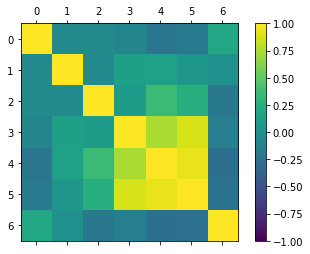

In [8]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

data = pandas.read_csv('featuresForSpark.csv')

correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names)
# ax.set_yticklabels(names)
plt.show()

In [11]:
import pandas as pd
import numpy as np
from scipy import stats

df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in data.columns:
    for y in data.columns:

        corr = stats.pearsonr(data[x], data[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]
print(df_p)
print(df_corr)

                                  entropy  left/right (1/0)  \
entropy                          0.000000          0.189217   
left/right (1/0)                 0.189217          0.000000   
number of exudate pixels         0.275503          0.244212   
min distance from od centre      0.082594          0.003698   
max distance from od centre      0.000002          0.001661   
average distance from od centre  0.000221          0.224503   
DR                               0.000039          0.902838   

                                 number of exudate pixels  \
entropy                                      2.755029e-01   
left/right (1/0)                             2.442118e-01   
number of exudate pixels                     0.000000e+00   
min distance from od centre                  2.247868e-02   
max distance from od centre                  3.682744e-16   
average distance from od centre              2.724027e-08   
DR                                           1.800903e-05   

      